Suppose a coin has probability $p$ of falling heads up. If we flip the coin many times, we would expect the proportion of heads to be near $p$. We will make this formal later. Take $p = 0.3$ and $n = 1000$ and simulate $n$ coin flips. Plot the proportion of heads as a function of n. Repeat for $p = 0.03$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Ex1_21(p = 0.3, n = 1000, draw = True, save = False):
    rand = np.random.random(size = 1000)
    _range = np.arange(1, n + 1)

    result = np.cumsum(rand < p) / _range

    fig, ax = plt.subplots()

    ax.plot(_range, result)

    if draw:
        plt.show()

    if save:
        # p = 0.213, n = 1000 -> 21pct_1000
        str_form = f"{math.floor(p * 100)}pct_{n}"
        fig.savefig(f"Ex1_21-{str_form}.png")

Ex1_21(p = 0.3, draw = True, save = True)
Ex1_21(p = 0.03, draw = True, save = True)

In [ ]:
def Ex1_22(p = 0.3, n = 1000, num_iter = 100):
    sum = 0
    for i in range(num_iter):
        rand = np.random.random(size = n)
        sum += np.sum(rand < p)

    mean = sum / num_iter
    expected = n * p
    delta = abs(mean - expected) / (expected)
    print(f"mean = {mean}, delta = {delta * 100:.2f}%")

for n in [10, 100, 1000]:
    Ex1_22(n = n)

In [ ]:
import numpy as np

labels = ['P(A)', 'P(B)', 'P(A, B)', 'P(A)P(B)', 
          'P(A, B) - P(A)P(B)']
pct_str = lambda x : f"{x * 100:.2f}%"

def Ex1_23_helper(probabilities):
    for label, prob in zip(labels, probabilities):
        print(f"\t{label}: {pct_str(prob)}")

def Ex1_23(A, B, n = 10000):
    cap = A.intersection(B)

    # rand does [) so I need to increment high to get 6
    rand = np.random.randint(low = 1, high = 6 + 1, size = n)
    prob_A = sum(np.isin(rand, list(A))) / n
    prob_B = sum(np.isin(rand, list(B))) / n
    prob_cap = sum(np.isin(rand, list(cap))) / n

    prob_prod = prob_A * prob_B

    probabilities = [prob_A, prob_B, prob_cap, prob_prod,
                     prob_cap - prob_prod]

    print("Experimental Values")
    Ex1_23_helper(probabilities)

A, B = {2, 4, 6}, {1, 2, 3, 4}
print(f"A = {A}, B = {B}, AB = {A.intersection(B)}")
print("Theoretical Values")
Ex1_23_helper([1/2, 2/3, 1/3, 1/3, 0])
Ex1_23(A, B)
print()

A, B = {1, 2, 3}, {3, 4, 5, 6}
print(f"A = {A}, B = {B}, AB = {A.intersection(B)}")
print("Theoretical Values")
Ex1_23_helper([1/2, 2/3, 1/6, 1/3, -1/6])
Ex1_23(A, B)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Ex3_11(n = 10000, draw = True, save = False, i = 0):
    # 2*0 - 1 = -1, 2 * 1 -1 = 1
    rand = 2 * np.random.randint(low = 0, high = 2, size = n) - 1

    fig, ax = plt.subplots()
    ax.plot(range(0, n), np.cumsum(rand))

    if draw:
        plt.show()

    if save:
        fig.savefig(f"Ex3_11-{i}.png")

for i in range(10):
    Ex3_11(draw = True, save = True, i = i)

In [1]:
import numpy as np

mC = np.array([0, 1/10, 1/5, 3/10, 2/5])
mP = np.array([0, 0.25, 0.5, 0.75, 1])
np.dot(mC, mP)

0.75

In [2]:
0.2 - mC / 2

array([0.2 , 0.15, 0.1 , 0.05, 0.  ])

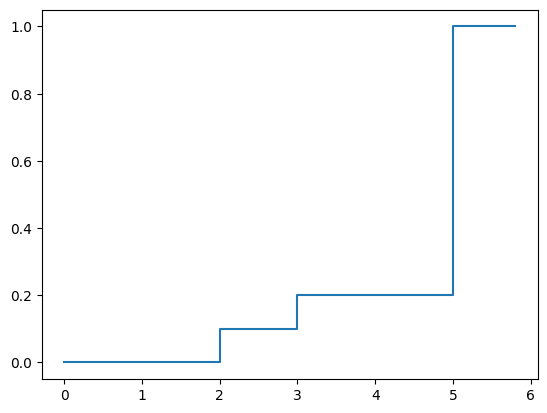

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def Ex2_2(draw = True, save = False):
    x = np.arange(start=0, stop = 6, step = 0.2)
    F = (x >= 2) * 0.1 + (x >= 3) * 0.1 + (x >= 5) * 0.8
    plt.step(x, F, where='post')
    plt.show()

Ex2_2(draw = True, save = True)

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def Ex2_2(draw = True, save = False):
    x = np.arange(start=0, stop = 6, step = 0.2)
    F = (x >= 2) * 0.1 + (x >= 3) * 0.1 + (x >= 5) * 0.8
    #plt.step(x, F, where='post')

    if save:
        plt.savefig("Ex2_2.png")
    if draw:
        plt.show()

    right = np.where(abs(x - 4.8) < 0.1)[0]
    left = np.where(abs(x - 2) < 0.1)[0]
    print("P(2 <  X <= 4.8) = ", (F[right] - F[left])[0])
    print("P(2 <= X <= 4.8) = ", (F[right] - F[left - 1])[0])

Ex2_2(draw = False, save = False)

P(2 <  X <= 4.8) =  0.1
P(2 <= X <= 4.8) =  0.2


37.56725742007256


(array([3.985e+03, 2.683e+03, 1.301e+03, 7.090e+02, 4.020e+02, 2.520e+02,
        1.810e+02, 1.070e+02, 8.200e+01, 5.400e+01, 5.700e+01, 3.500e+01,
        3.600e+01, 2.000e+01, 1.700e+01, 1.400e+01, 1.100e+01, 1.100e+01,
        7.000e+00, 8.000e+00, 4.000e+00, 7.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.51967614e-02, 7.76037975e-01, 1.52687919e+00, 2.27772040e+00,
        3.02856161e+00, 3.77940283e+00, 4.53024404e+00, 5.28108525e+00,
        6.03192647e+00, 6.78276768e+00, 7.53360889e+00, 8.28445011e+00,
        9.03529132e+00, 9.78613253e+00, 1.05369737e+01, 1.12878150e+01,
        1.20386562e+01, 1.27894974e+01, 1.35403386e+01, 1.42911798e+01,
        1.504202

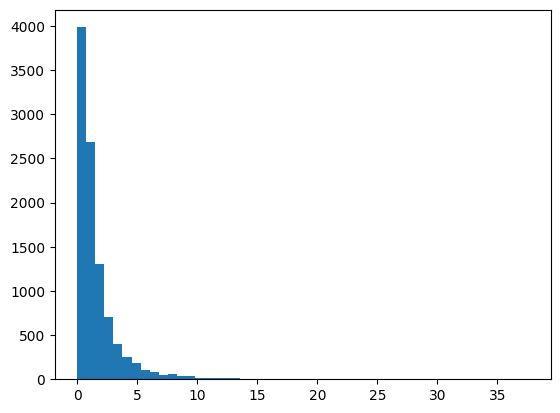

In [101]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(10000)
y = np.exp(x)

print(np.max(y))

plt.hist(y, bins = 50)

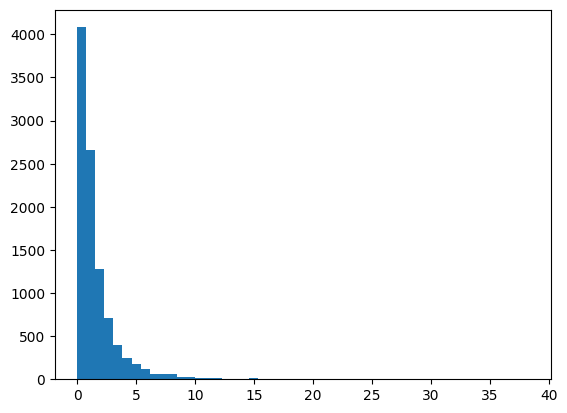

In [105]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(10000)
y = np.exp(x)

plt.hist(y, bins=50)
plt.savefig('Ex2_13b.png', dpi=300)

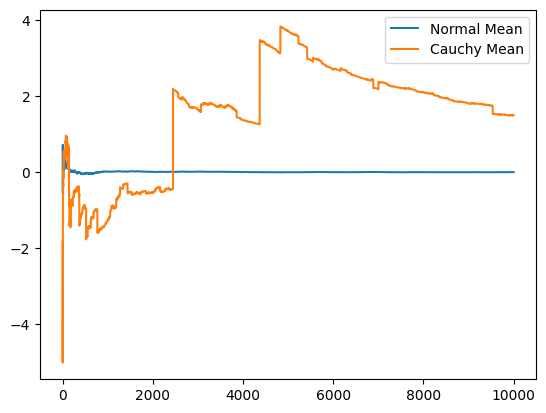

In [34]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000

samples = np.random.normal(size = n)
samples_cauchy = np.random.standard_cauchy(size = n)

x = (np.arange(n) + 1)

mean = np.cumsum(samples) / x
mean_cauchy = np.cumsum(samples_cauchy) / x

plt.plot(x, mean, label='Normal Mean')
plt.plot(x, mean_cauchy, label='Cauchy Mean')

plt.legend(loc='upper right')

plt.savefig("Ex3_9.png")

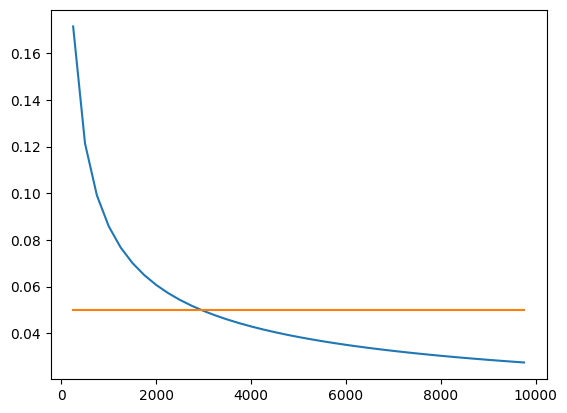

In [81]:
import numpy as np
import matplotlib.pyplot as plt

n_list = np.arange(start=1, step=250, stop=10000, dtype=int)
alpha = 0.05
p = 0.4

coverages, lengths = {}, {}
for n in n_list:
    eps = np.sqrt(np.log(2 / alpha) / (2 * n))

    coverage, length = 0, []
    for i in range(100):
        X = np.random.binomial(n = 1, p = p, size = n)
        mean = np.mean(X)
        
        if (p < (mean - eps)) or (p > (mean + eps)):
            coverage += 1

        length.append(2 * eps) 

    coverages[n] = coverage
    lengths[n] = np.mean(length)

x = list(coverages.keys())
y_cov = list(coverages.values())
y_len = list(lengths.values())

plt.scatter(x, y)
plt.savefig("Ex4_4b.png")
plt.cla()
plt.plot(x[1:], y_len[1:]) # First length skews the plot heavily
plt.plot(x[1:], [0.05]*(len(x[:])-1)) # Horizontal Line
plt.savefig("Ex4_4c.png")

In [71]:
[3]*3

[3, 3, 3]

In [78]:
type(y_len)

list